# Q1

In [2]:
import pandas as pd 
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv('transactions_n100000.csv')

In [4]:
df1['order_timestamp']=pd.to_datetime(df1['order_timestamp'])

In [5]:
df1['time']=df1['order_timestamp'].dt.hour
df1['date']=df1['order_timestamp'].dt.date

In [10]:
df1.describe()

,location,item_count,lat,long,time
count,260741.000000,260741.000000,260741.000000,260741.000000,260741.000000
mean,5.128123,2.446424,41.836145,-87.733627,12.115172
std,2.557513,1.330490,0.144791,0.135937,7.525635
min,1.000000,1.000000,41.524598,-88.010140,0.000000
25%,3.000000,1.000000,41.784576,-87.849468,1.000000
50%,5.000000,2.000000,41.881818,-87.677606,13.000000
75%,7.000000,4.000000,41.889047,-87.627059,18.000000
max,9.000000,5.000000,42.049306,-87.607565,23.000000


In [45]:
df = df1.copy()

In [46]:
#Drorpping TicketID column
df.drop(['order_timestamp','lat','long'], inplace = True, axis = 1)

In [47]:
df

,ticket_id,location,item_name,item_count,time,date
0,0x872a40,4,shake,2,18,2019-02-28
1,0x872a40,4,burger,2,18,2019-02-28
2,0x872a40,4,fries,2,18,2019-02-28
3,0x598eb3,5,burger,1,11,2019-09-18
4,0x598eb3,5,salad,2,11,2019-09-18
...,...,...,...,...,...,...
260736,0x3c0582,9,burger,3,17,2019-05-27
260737,0x3c0582,9,salad,1,17,2019-05-27
260738,0x3c0582,9,fries,4,17,2019-05-27
260739,0x104597,2,burger,3,0,2019-12-10


In [48]:
df["time_period"] = pd.cut(
                       df['time'],
                       bins = [-1,6,12,18,24],           # Else devise your bins: [0,20,60,110]
                       labels= ["mid-night","morning","noon", "night"]
                      )

In [49]:
df

,ticket_id,location,item_name,item_count,time,date,time_period
0,0x872a40,4,shake,2,18,2019-02-28,noon
1,0x872a40,4,burger,2,18,2019-02-28,noon
2,0x872a40,4,fries,2,18,2019-02-28,noon
3,0x598eb3,5,burger,1,11,2019-09-18,morning
4,0x598eb3,5,salad,2,11,2019-09-18,morning
...,...,...,...,...,...,...,...
260736,0x3c0582,9,burger,3,17,2019-05-27,noon
260737,0x3c0582,9,salad,1,17,2019-05-27,noon
260738,0x3c0582,9,fries,4,17,2019-05-27,noon
260739,0x104597,2,burger,3,0,2019-12-10,mid-night


In [50]:
df['shake'] = df.loc[df['item_name']=='shake','item_count']
df['burger'] = df.loc[df['item_name']=='burger','item_count']
df['fries'] = df.loc[df['item_name']=='fries','item_count']
df['salad'] = df.loc[df['item_name']=='salad','item_count']

In [51]:
df

,ticket_id,location,item_name,item_count,time,date,time_period,shake,burger,fries,salad
0,0x872a40,4,shake,2,18,2019-02-28,noon,2.0,NaN,NaN,NaN
1,0x872a40,4,burger,2,18,2019-02-28,noon,NaN,2.0,NaN,NaN
2,0x872a40,4,fries,2,18,2019-02-28,noon,NaN,NaN,2.0,NaN
3,0x598eb3,5,burger,1,11,2019-09-18,morning,NaN,1.0,NaN,NaN
4,0x598eb3,5,salad,2,11,2019-09-18,morning,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,9,burger,3,17,2019-05-27,noon,NaN,3.0,NaN,NaN
260737,0x3c0582,9,salad,1,17,2019-05-27,noon,NaN,NaN,NaN,1.0
260738,0x3c0582,9,fries,4,17,2019-05-27,noon,NaN,NaN,4.0,NaN
260739,0x104597,2,burger,3,0,2019-12-10,mid-night,NaN,3.0,NaN,NaN


In [52]:
df['shake'] = df['shake'].fillna(0)
df['burger'] = df['burger'].fillna(0)
df['fries'] = df['fries'].fillna(0)
df['salad'] = df['salad'].fillna(0)

In [53]:
df

,ticket_id,location,item_name,item_count,time,date,time_period,shake,burger,fries,salad
0,0x872a40,4,shake,2,18,2019-02-28,noon,2.0,0.0,0.0,0.0
1,0x872a40,4,burger,2,18,2019-02-28,noon,0.0,2.0,0.0,0.0
2,0x872a40,4,fries,2,18,2019-02-28,noon,0.0,0.0,2.0,0.0
3,0x598eb3,5,burger,1,11,2019-09-18,morning,0.0,1.0,0.0,0.0
4,0x598eb3,5,salad,2,11,2019-09-18,morning,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,9,burger,3,17,2019-05-27,noon,0.0,3.0,0.0,0.0
260737,0x3c0582,9,salad,1,17,2019-05-27,noon,0.0,0.0,0.0,1.0
260738,0x3c0582,9,fries,4,17,2019-05-27,noon,0.0,0.0,4.0,0.0
260739,0x104597,2,burger,3,0,2019-12-10,mid-night,0.0,3.0,0.0,0.0


In [54]:
df = df.groupby('ticket_id').agg({'location':'min','time_period':'min','date':'min','shake':'sum','burger':'sum','fries':'sum','salad':'sum'})

In [55]:
df.loc['0x872a40']

location                4
time_period          noon
date           2019-02-28
shake                   2
burger                  2
fries                   2
salad                   0
Name: 0x872a40, dtype: object

In [56]:
df.head(5)

,location,time_period,date,shake,burger,fries,salad
ticket_id,,,,,,,
0x100048,1,morning,2019-03-29,0.0,0.0,3.0,3.0
0x100057,6,mid-night,2019-11-24,0.0,1.0,1.0,0.0
0x1000ba,5,morning,2019-02-09,1.0,1.0,2.0,1.0
0x1000fb,4,night,2019-08-31,4.0,4.0,5.0,1.0
0x10016e,7,noon,2019-09-13,3.0,3.0,3.0,0.0


In [57]:
#Transformation item_name to dummies

df=pd.get_dummies(df, columns=['location'], sparse=False, drop_first=True, dtype=None)

df=pd.get_dummies(df, columns=['time_period'], sparse=False, drop_first=True, dtype=None)


In [58]:
df.head()

,date,shake,burger,fries,salad,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,time_period_morning,time_period_night,time_period_noon
ticket_id,,,,,,,,,,,,,,,,
0x100048,2019-03-29,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,1,0,0
0x100057,2019-11-24,0.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0
0x1000ba,2019-02-09,1.0,1.0,2.0,1.0,0,0,0,1,0,0,0,0,1,0,0
0x1000fb,2019-08-31,4.0,4.0,5.0,1.0,0,0,1,0,0,0,0,0,0,1,0
0x10016e,2019-09-13,3.0,3.0,3.0,0.0,0,0,0,0,0,1,0,0,0,0,1


## drop date (have time period)

In [59]:
df.drop(columns=['date'],inplace = True)

In [60]:
df

,shake,burger,fries,salad,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,time_period_morning,time_period_night,time_period_noon
ticket_id,,,,,,,,,,,,,,,
0x100048,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,1,0,0
0x100057,0.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0
0x1000ba,1.0,1.0,2.0,1.0,0,0,0,1,0,0,0,0,1,0,0
0x1000fb,4.0,4.0,5.0,1.0,0,0,1,0,0,0,0,0,0,1,0
0x10016e,3.0,3.0,3.0,0.0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xffddf,3.0,3.0,3.0,0.0,0,0,1,0,0,0,0,0,0,0,1
0xffe25,0.0,2.0,2.0,0.0,0,0,0,0,1,0,0,0,0,0,0
0xffec9,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1


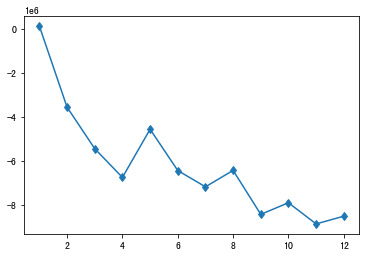

In [61]:
## Using aic and bic measures to find ideal number of cluster
bic = []
#aic = []
for i in range(12):
    gm = GaussianMixture(
                     n_components = i+1,
                     covariance_type='full')
    
    gm.fit(df)
    bic.append(gm.bic(df))
    #aic.append(gm.aic(df))
    
# Look at the plots

fig = plt.figure()
#plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], aic, marker = "d", label = 'aic')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], bic, marker = "d", label = 'bic')
plt.show()

In [24]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(df)  

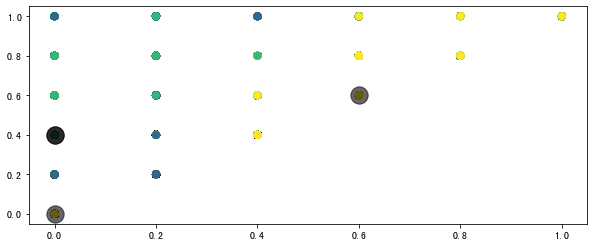

In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn

gmm = GaussianMixture(n_components=4, covariance_type='full',
                      tol=0.001, reg_covar=1e-06, max_iter=100,
                      n_init=1, init_params='kmeans', weights_init=None, 
                      means_init=None, precisions_init=None, random_state=None, 
                      warm_start=False, verbose=0, verbose_interval=10).fit(X)

prediction_gmm = gmm.predict(X)
probs = gmm.predict_proba(X)

centers = np.zeros((4,15))
for i in range(4):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]

plt.figure(figsize = (10,4))
plt.scatter(X[:, 0], X[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [29]:
#assign datapoints into cluster

labels=gmm.fit_predict(df, y=None)

df['lables']= labels

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x100048 to 0xfffac
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   shake                100000 non-null  float64
 1   burger               100000 non-null  float64
 2   fries                100000 non-null  float64
 3   salad                100000 non-null  float64
 4   location_2           100000 non-null  uint8  
 5   location_3           100000 non-null  uint8  
 6   location_4           100000 non-null  uint8  
 7   location_5           100000 non-null  uint8  
 8   location_6           100000 non-null  uint8  
 9   location_7           100000 non-null  uint8  
 10  location_8           100000 non-null  uint8  
 11  location_9           100000 non-null  uint8  
 12  time_period_morning  100000 non-null  uint8  
 13  time_period_night    100000 non-null  uint8  
 14  time_period_noon     100000 non-null  uint8  
 15  lables        

In [31]:
df2 = df.copy()

In [32]:
df2.loc[df2['location_2']==1,'location_2'] = 2
df2.loc[df2['location_3']==1,'location_3'] = 3
df2.loc[df2['location_4']==1,'location_4'] = 4
df2.loc[df2['location_5']==1,'location_5'] = 5
df2.loc[df2['location_6']==1,'location_6'] = 6
df2.loc[df2['location_7']==1,'location_7'] = 7
df2.loc[df2['location_8']==1,'location_8'] = 8
df2.loc[df2['location_9']==1,'location_9'] = 9

In [33]:
df2['location'] = df2['location_2'] + df2['location_3'] + df2['location_4'] + df2['location_5'] + \
                  df2['location_6'] + df2['location_7'] + df2['location_8'] + df2['location_9']

In [34]:
df2.loc[df2['location']==0,'location'] = 1

In [35]:
# 0:mid-night, morning:1, night:2, noon:3
df2.loc[df2['time_period_morning']==1,'time_period_morning'] = 1
df2.loc[df2['time_period_night']==1,'time_period_night'] = 2
df2.loc[df2['time_period_noon']==1,'time_period_noon'] = 3


In [36]:
df2['time'] = df2['time_period_morning'] + df2['time_period_night'] + df2['time_period_noon']

In [37]:
df2.loc[df2['time']==0,'time'] = 0

In [38]:
del df2['location_2']
del df2['location_3']
del df2['location_4']
del df2['location_5']
del df2['location_6']
del df2['location_7']
del df2['location_8']
del df2['location_9']


del df2['time_period_morning']
del df2['time_period_night']
del df2['time_period_noon']


In [39]:
df2.to_csv('gmm_final.csv')